Setting up the functions to perform the training and data recording

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from time import time
import tracemalloc
import psutil
import warnings
import random
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

phones = pd.read_csv('phone_final.csv')
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [2]:
features = phones.drop('price_range',axis=1)
labels = phones['price_range']

#split features and labels into train (80%) and test (20%) sets
#f for features
#l for labels
def split_features(features,labels):
    f_train, f_test, l_train, l_test = train_test_split(features,labels, test_size=0.2,random_state=42)
    #f_val, f_test, l_val, l_test = train_test_split(f_test,l_test, test_size=0.5,random_state=42)
    
    return f_train, f_test, l_train, l_test

In [3]:
def svm_trainer(features,labels,train_count):
    svc = SVC()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        svc.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return svc, f_test, l_test, train_times

#train_times = svm_trainer(features,labels,train_count=10)
#print("done!")

In [4]:
def knn_trainer(features,labels,train_count):
    knn = KNeighborsClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        knn.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return knn, f_test, l_test, train_times

#train_times = knn_trainer(features,labels,train_count=10)
#print("done!")

In [5]:
def logistic_regression_trainer(features,labels,train_count):
    lr = LogisticRegression()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        lr.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return lr, f_test, l_test, train_times

#train_times = logistic_regression_trainer(features,labels,train_count=10)
#print("done!")

In [6]:
def multilayer_perceptron_trainer(features,labels,train_count):
    MLP = MLPClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        MLP.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return MLP, f_test, l_test, train_times

#train_times = multilayer_perceptron_trainer(features,labels,train_count=10)
#print("done!")

In [7]:
def random_forest_trainer(features,labels,train_count):
    rf = RandomForestClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        rf.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return rf, f_test, l_test, train_times

#train_times = random_forest_trainer(features,labels,train_count=10)
#print("done!")

In [ ]:
nom_util = psutil.cpu_percent(interval=1)
KNN, knn_f_test, knn_l_test, knn_times = knn_trainer(features,labels,train_count=10)
knn_util = psutil.cpu_percent(interval=None)
LR, lr_f_test, lr_l_test, lr_times = logistic_regression_trainer(features,labels,train_count=10)
lr_util = psutil.cpu_percent(interval=None)
SVM, svm_f_test, svm_l_test, svm_times = svm_trainer(features,labels,train_count=10)
svm_util = psutil.cpu_percent(interval=None)
RF, rf_f_test, rf_l_test, rf_times = random_forest_trainer(features,labels,train_count=10)
rf_util = psutil.cpu_percent(interval=None)
MLP, mlp_f_test, mlp_l_test, mlp_times = multilayer_perceptron_trainer(features,labels,train_count=10)
mlp_util = psutil.cpu_percent(interval=None)
print('finished training!')

In [ ]:
tracemalloc.start()

KNN, knn_f_test, knn_l_test, knn_times = knn_trainer(features,labels,train_count=10)
knn_current, knn_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

tracemalloc.start()
LR, lr_f_test, lr_l_test, lr_times = logistic_regression_trainer(features,labels,train_count=10)
lr_current, lr_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

tracemalloc.start()
SVM, svm_f_test, svm_l_test, svm_times = svm_trainer(features,labels,train_count=10)
svm_current, svm_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

tracemalloc.start()
RF, rf_f_test, rf_l_test, rf_times = random_forest_trainer(features,labels,train_count=10)
rf_current, rf_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

tracemalloc.start()
MLP, mlp_f_test, mlp_l_test, mlp_times = multilayer_perceptron_trainer(features,labels,train_count=10)
mlp_current, mlp_peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

print('finished training!')

In [40]:
current_list = [knn_current, lr_current, svm_current, rf_current, mlp_current]
peak_list = [knn_peak, lr_peak, svm_peak, rf_peak, mlp_peak]

print(current_list)
print(peak_list)

[25008, 14320, 16652, 34268, 18956]
[41388, 30700, 33032, 104567, 159195]


In [41]:
mem_df = pd.DataFrame(peak_list)
mem_df.to_csv('phone_peak_mem.csv',index=False)

In [9]:
cpu_array = [nom_util, knn_util, lr_util, svm_util, rf_util, mlp_util]
print(cpu_array)

[5.4, 14.1, 14.3, 13.6, 15.2, 99.9]


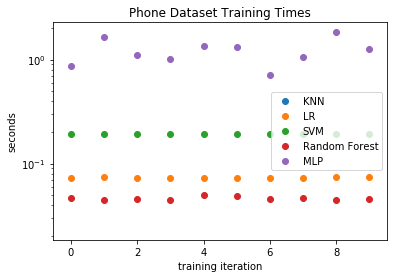

In [10]:
plt.scatter(range(len(knn_times)),knn_times,label="KNN")
plt.scatter(range(len(lr_times)),lr_times,label="LR")
plt.scatter(range(len(svm_times)),svm_times,label='SVM')
plt.scatter(range(len(rf_times)),rf_times,label='Random Forest')
plt.scatter(range(len(mlp_times)),mlp_times,label='MLP')
plt.title('Phone Dataset Training Times')
plt.yscale('log')
plt.xlabel('training iteration')
plt.ylabel('seconds')
plt.legend(loc='center right')
plt.savefig('phone_training_times_log.png')
plt.show()

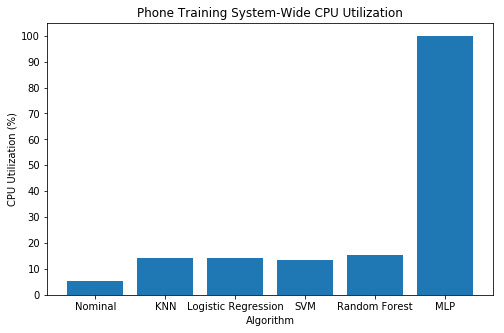

In [11]:
plt.figure(figsize=(8,5))
plt.bar(range(len(cpu_array)), cpu_array)
plt.title('Phone Training System-Wide CPU Utilization')
plt.xticks(range(len(cpu_array)), ['Nominal','KNN','Logistic Regression','SVM','Random Forest','MLP'])
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.ylabel('CPU Utilization (%)')
plt.xlabel('Algorithm')
plt.savefig('phone_training_cpu_utilization.png')
plt.show()

In [12]:
cpu_df = pd.DataFrame(cpu_array)
cpu_df.to_csv('phone_cpu.csv',index=False)

In [13]:
test_size = 500
knn_test_list = [knn_f_test.iloc[random.randint(0,len(knn_f_test)-1)] for i in range(test_size)]
lr_test_list = [lr_f_test.iloc[random.randint(0,len(lr_f_test)-1)] for i in range(test_size)]
svm_test_list = [svm_f_test.iloc[random.randint(0,len(svm_f_test)-1)] for i in range(test_size)]
rf_test_list = [rf_f_test.iloc[random.randint(0,len(rf_f_test)-1)] for i in range(test_size)]
mlp_test_list = [mlp_f_test.iloc[random.randint(0,len(mlp_f_test)-1)] for i in range(test_size)]

In [30]:
t0 = time()
knn_pred_list = KNN.predict(knn_test_list)
t1 = time()
lr_pred_list = LR.predict(lr_test_list)
t2 = time()
svm_pred_list = SVM.predict(svm_test_list)
t3 = time()
rf_pred_list = RF.predict(rf_test_list)
t4 = time()
mlp_pred_list = MLP.predict(mlp_test_list)
t5 = time()

pred_time_list = [t1-t0, t2-t1, t3-t2, t4-t3, t5-t4]

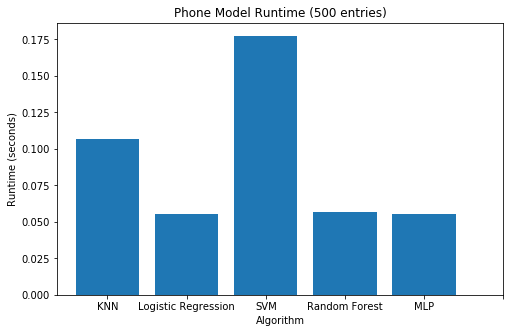

In [15]:
plt.figure(figsize=(8,5))
plt.bar(range(len(pred_time_list)), pred_time_list)
plt.title('Phone Model Runtime (%d entries)' % (test_size))
plt.xticks(range(len(cpu_array)), ['KNN','Logistic Regression','SVM','Random Forest','MLP'])
plt.ylabel('Runtime (seconds)')
plt.xlabel('Algorithm')
plt.savefig('phone_model_runtime.png')
plt.show()

In [16]:
runtime_df = pd.DataFrame(pred_time_list)
runtime_df.to_csv('phone_runtime.csv',index=False)

In [17]:
train_df = pd.DataFrame([np.mean(knn_times), np.mean(lr_times), np.mean(svm_times), np.mean(rf_times), np.mean(mlp_times)])
train_df.to_csv('phone_train_times.csv',index=False)

Run the predictions again; this time to get utilization

In [26]:
def accuracy_measure(pred_list, test_list, l_test):
    correct_count = 0
    for ii in range(0,len(pred_list)):
        pred = pred_list[ii]
        label = l_test[test_list[ii].name]
        if pred == label:
            correct_count += 1
    return correct_count/len(pred_list)
        

In [32]:
accuracy_list = [accuracy_measure(knn_pred_list, knn_test_list, knn_l_test),
                 accuracy_measure(lr_pred_list, lr_test_list, lr_l_test),
                 accuracy_measure(svm_pred_list, svm_test_list, svm_l_test),
                 accuracy_measure(rf_pred_list, rf_test_list, rf_l_test),
                 accuracy_measure(mlp_pred_list, mlp_test_list, mlp_l_test)]
print(accuracy_list)

acc_df = pd.DataFrame(accuracy_list)
acc_df.to_csv('phone_accuracy.csv',index=False)

[0.992, 0.966, 0.452, 0.962, 0.856]
